# Data Preprocessing and Analysis Notebook

In this notebook, we will perform preprocessing and analysis on the dataset **Allergen_Status_of_Food_Products.csv**. The steps include handling missing values, identifying duplicates, visualizing outliers, and applying encoding techniques to prepare the data for machine learning models.

# Import necessary libraries

We begin by importing the necessary libraries for data preprocessing, visualization, and encoding. These libraries provide essential tools for handling data and implementing the required transformations.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders import LeaveOneOutEncoder
import pickle

# Reading the Dataset

We will read the dataset using pandas. The dataset contains information about food products, including whether they are allergens, their prices, and customer ratings. We'll use the keep_default_na=False argument to handle empty strings and replace them with NaN values for easier processing.

In [26]:
# Load the dataset
df = pd.read_csv("Dataset/Allergen_Status_of_Food_Products.csv", keep_default_na=False, na_values=[""])
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,Contains


# Preprocessing the Dataset

Preprocessing is a critical step in data analysis to ensure the dataset is clean and ready for further exploration and modeling. This involves handling missing values and duplicates.

## Handling Null Values in the Dataset

Missing values can lead to errors during data analysis or model training. We will check for null values in each column and drop rows with missing data.

In [27]:
# Check for null values
print("Null values in each column:")
print(df.isnull().sum())

# Drop rows with null values
df.dropna(axis=0, inplace=True)

Null values in each column:
Food Product                  0
Main Ingredient               0
Sweetener                     0
Fat/Oil                       0
Seasoning                     0
Allergens                     0
Price ($)                     0
Customer rating (Out of 5)    0
Prediction                    1
dtype: int64


## Identifying Duplicates in the Dataset

Duplicate rows can inflate the dataset size and introduce bias in the analysis. Here, we identify and display duplicate rows for removal.

In [28]:
# Identify duplicate rows in the dataset
duplicates = df.duplicated()
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [Food Product, Main Ingredient, Sweetener, Fat/Oil, Seasoning, Allergens, Price ($), Customer rating (Out of 5), Prediction]
Index: []


# Visualizing Outliers

Outliers can skew the analysis and impact the performance of machine learning models. We will use box plots and scatter plots to identify outliers in the Customer rating and Price ($) columns.

## Box Plot and Scatter Plot for Numerical Features

Box plots and scatter plots help visualize the distribution and variability in the dataset.

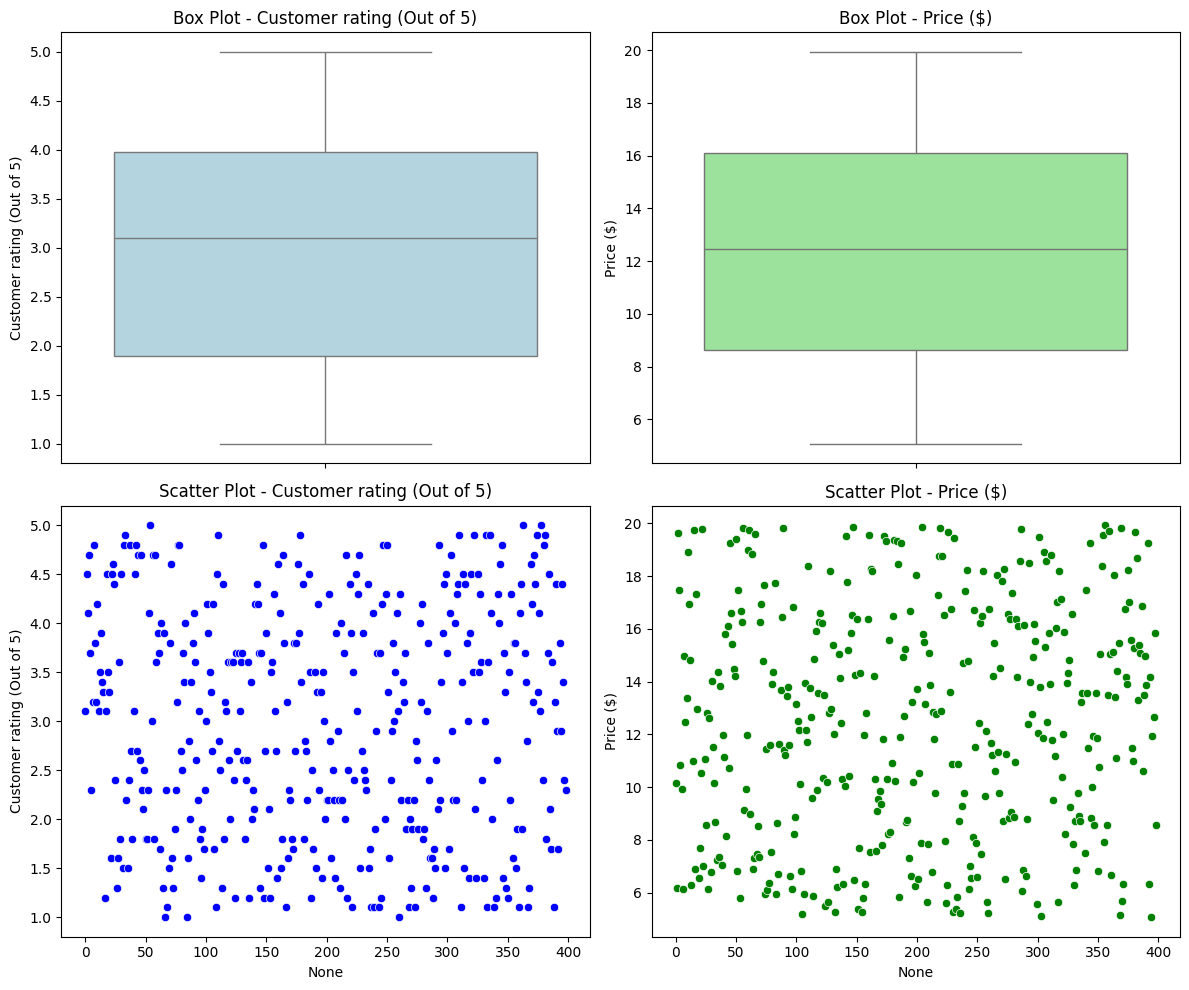

In [29]:
# Visualizing outliers using box and scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Box plot for 'Customer rating'
sns.boxplot(data=df['Customer rating (Out of 5)'], ax=axes[0, 0], color='lightblue')
axes[0, 0].set_title('Box Plot - Customer rating (Out of 5)')

# Box plot for 'Price ($)'
sns.boxplot(data=df['Price ($)'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Box Plot - Price ($)')

# Scatter plot for 'Customer rating'
sns.scatterplot(x=df.index, y=df['Customer rating (Out of 5)'], ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Scatter Plot - Customer rating (Out of 5)')

# Scatter plot for 'Price ($)'
sns.scatterplot(x=df.index, y=df['Price ($)'], ax=axes[1, 1], color='green')
axes[1, 1].set_title('Scatter Plot - Price ($)')

plt.tight_layout()
plt.show()

# Encoding Categorical Variables

Many machine learning algorithms require numerical inputs. We will encode the categorical variables to make them suitable for modeling.

## Label Encoding for Prediction

Label encoding assigns integer labels to unique categories in the Is_Allergen column, making it easier to process while retaining the original order of values.

In [30]:
# Apply label encoding for Prediction
label_encoder = LabelEncoder()
df['Prediction'] = label_encoder.fit_transform(df['Prediction'])
print("Dataset after label encoding 'Prediction':")
df.head()

Dataset after label encoding 'Prediction':


,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,0
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,0
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,0
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,0
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,0


## Leave-One-Out Encoding for Categorical Variables

For other categorical variables, we use Leave-One-Out Encoding, which minimizes data leakage during training by encoding based on mean values computed without including the current row.

In [31]:
# Apply Leave-One-Out encoding for all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
loo_encoder = LeaveOneOutEncoder(cols=categorical_columns)

# Transform the categorical columns
df_encoded = loo_encoder.fit_transform(df[categorical_columns], df['Price ($)'])

# Combine the encoded columns with the rest of the dataset
df = pd.concat([df.drop(categorical_columns, axis=1), df_encoded], axis=1)

# Save the encoder for later use
with open('Model/leave_one_out_encoder.pkl', 'wb') as file:
    pickle.dump(loo_encoder, file)

print("Dataset after Leave-One-Out Encoding:")
df.head()

Dataset after Leave-One-Out Encoding:


,Price ($),Customer rating (Out of 5),Prediction,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens
0,10.15,3.1,0,6.170000,6.170,12.343736,12.471786,13.408,6.170000
1,6.17,4.5,0,10.150000,10.150,12.387473,12.519167,13.806,10.150000
2,19.65,4.1,0,12.500000,17.480,12.371511,12.031228,11.584,17.480000
3,17.48,4.7,0,13.223333,19.650,12.379317,12.069298,11.801,19.650000
4,10.83,3.7,0,12.397588,17.925,12.403237,12.185965,12.466,12.072073


# Saving the Processed Dataset

The preprocessed dataset will be saved as a CSV file for further analysis and modeling. This ensures that we can reuse the processed data without repeating these steps.

In [32]:
# Save the processed dataset to a CSV file
df.to_csv('Dataset/preprocessed_data.csv', index=False)
print("Processed dataset saved as 'preprocessed_data.csv'.")

Processed dataset saved as 'preprocessed_data.csv'.
